# **WhatKey**

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Proyecto IA')
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Proyecto IA


# **Importar librerias**

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
sns.set_theme()

(1, 6000)
6000
<class 'numpy.ndarray'>
[[  0 255   0 ...   0   0   0]]


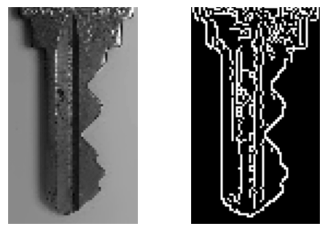

In [ ]:
I = cv2.imread("keys recortadas/datakeys2/key (1).jpg", 0)

I = cv2.resize(I, (60,100))
In = cv2.fastNlMeansDenoising(I)
I = cv2.Canny(In,50,100)

plt.subplot(121), plt.imshow(In,cmap='gray')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.subplot(122), plt.imshow(I,cmap='gray')
plt.grid(False)
plt.xticks([])
plt.yticks([])

I = np.reshape(I,(1,6000))
print(I.shape)
print(np.size(I))
print(type(I))
print(I)

# Clasificando las imagenes

Para esta sección primero se leeran las imagenes con la libreria "CV2", seguido de esto se clasificaran las imagenes en numpy arrays, donde el primer array 'keys' es usado en los clasificadores y el array 'keysT' es usado en la red neuronal.

In [ ]:
keys = np.zeros(shape=(184, 6000))
keysT = np.zeros(shape=(184, 100, 60))
for i in range(184):
  I = cv2.imread(f"keys recortadas/datakeys2/key ({i+1}).jpg", 0) 
  I = cv2.resize(I, (60,100))
  M = cv2.fastNlMeansDenoising(I)
  keysT[i] = M
  M = np.reshape(M,(1,6000))
  keys[i] = M

In [ ]:
print("Array para los clasificadores", keys.shape)
print("Array para la red neuronal", keysT.shape)

Array para los clasificadores (184, 6000)
Array para la red neuronal (184, 100, 60)


Seguido de esto creamos un array 'label' donde contendra las etiquetas de las llaves. Dicho array lo utilizaremos para la clasificacion de las llaves en el entreno de los clasificadores.

In [ ]:
labels = []
label = 0
for i in range(50):
  labels.append(label)

label += 1
for i in range(48):
  labels.append(label)

label += 1
for i in range(49):
  labels.append(label)

label += 1
for i in range(37):
  labels.append(label)

len(labels)

184

In [ ]:
X = keys
y = np.array(labels)

Creamos los arrays con un 20% en el test y 80% en el train de os datos completos que utilizaremos en los clasificadores correspondientes para entrenarlos, los cuales seran los siguientes: Naive Gausean Bayes, Super Vector Classifier y Random Forest Classifier

In [ ]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)

In [ ]:
print( X_train.shape, X_test.shape)
print( y_train.shape, y_test.shape)

(147, 6000) (37, 6000)
(147,) (37,)


# **Clasificadores**

# Naive gaussian bayes

In [ ]:
NB = GaussianNB()
NB.fit(X_train, y_train)
predictions_Bayes = NB.predict(X_test)

<Figure size 432x288 with 0 Axes>

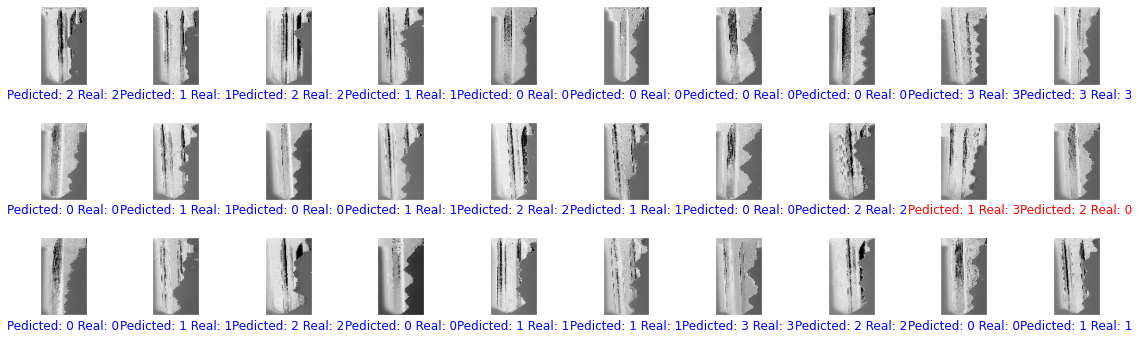

In [ ]:
#@title *code* Batch of predictions
%run Functions/dl_plot_clasificador2.py
num_rows = 3
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_Bayes, y_test, X_test)

In [ ]:
print( "acierto en train", NB.score(X_train, y_train))
print( "acierto en test ", NB.score(X_test, y_test))

acierto en train 1.0
acierto en test  0.918918918918919


# Super Vector Classifier

In [ ]:
SVC_poly = SVC(kernel='poly')
SVC_poly.fit(X_train, y_train)
predictions_SVC = SVC_poly.predict(X_test)

<Figure size 432x288 with 0 Axes>

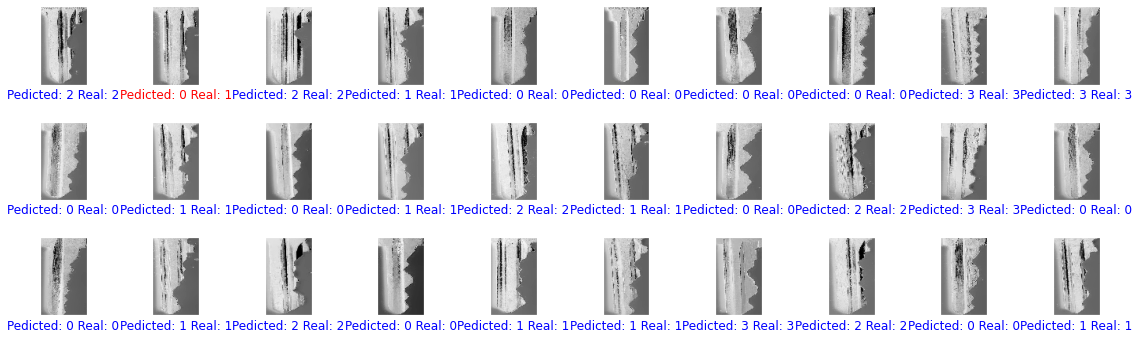

In [ ]:
%run Functions/dl_plot_clasificador2.py
num_rows = 3
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_SVC, y_test, X_test)

In [ ]:
print( "acierto en train", SVC_poly.score(X_train, y_train))
print( "acierto en test ", SVC_poly.score(X_test, y_test))

acierto en train 1.0
acierto en test  0.9459459459459459


# Random Forest Classifier

In [ ]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
predictions_RandomForest = RFC.predict(X_test)

<Figure size 432x288 with 0 Axes>

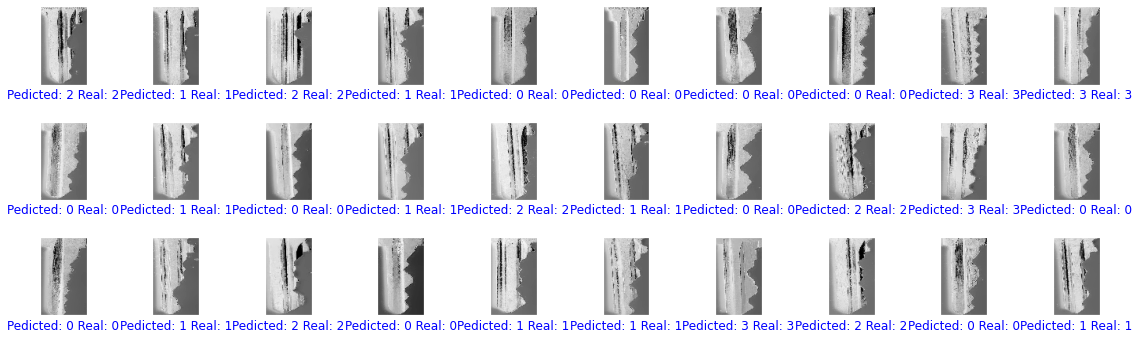

In [ ]:
%run Functions/dl_plot_clasificador2.py
num_rows = 3
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_RandomForest, y_test, X_test)

In [ ]:
print( "acierto en train", RFC.score(X_train, y_train))
print( "acierto en test ", RFC.score(X_test, y_test))

acierto en train 1.0
acierto en test  0.972972972972973


# Acierto en todo el array de imagenes por parte de los clasificadores

Naive Gausean Bayes

In [ ]:
s = cross_val_score(GaussianNB(), X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.951 (+/- 0.02648)


Super Vector Classifier

In [ ]:
s = cross_val_score(SVC(kernel='poly'), X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.962 (+/- 0.01312)


Random Forest Classifier

In [ ]:
s = cross_val_score(RandomForestClassifier(), X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.957 (+/- 0.02748)


# **Deep Learning**

In [ ]:
X = keysT
y = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(147, 100, 60) (147,) (37, 100, 60) (37,)


In [ ]:
#@title *code* Para normalizar y preparar los datos
X_train = X_train.reshape([-1, 60, 100, 1])
X_test = X_test.reshape([-1, 60, 100, 1])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_test', X_test.shape[0])

X_train shape: (147, 60, 100, 1)
Number of images in X_train 147
Number of images in X_test 37


In [ ]:
#@title *code* Creando la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=[60, 100, 1]),
    tf.keras.layers.Dense(1024, activation=tf.nn.tanh),
    tf.keras.layers.Dense(512, activation=tf.nn.tanh),
    tf.keras.layers.Dense(256, activation=tf.nn.tanh),
    tf.keras.layers.Dense(128, activation=tf.nn.tanh),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 6000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              6145024   
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 516       
Total params: 6,834,564
Trainable params: 6,834,564
Non-trainable params: 0
____________________________________________

In [ ]:
#@title *code* Entrenando la red neuronal
model.compile(optimizer=tf.keras.optimizers.SGD(),  #AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
5/5 [==============================] - 1s 48ms/step - loss: 1.9114 - accuracy: 0.2733
Epoch 2/50
5/5 [==============================] - 0s 44ms/step - loss: 1.3085 - accuracy: 0.3965
Epoch 3/50
5/5 [==============================] - 0s 44ms/step - loss: 1.0421 - accuracy: 0.6001
Epoch 4/50
5/5 [==============================] - 0s 42ms/step - loss: 0.8961 - accuracy: 0.6342
Epoch 5/50
5/5 [==============================] - 0s 42ms/step - loss: 0.7064 - accuracy: 0.8052
Epoch 6/50
5/5 [==============================] - 0s 43ms/step - loss: 1.1291 - accuracy: 0.5298
Epoch 7/50
5/5 [==============================] - 0s 49ms/step - loss: 0.7965 - accuracy: 0.7809
Epoch 8/50
5/5 [==============================] - 0s 44ms/step - loss: 0.4802 - accuracy: 0.8758
Epoch 9/50
5/5 [==============================] - 0s 42ms/step - loss: 0.5369 - accuracy: 0.7773
Epoch 10/50
5/5 [==============================] - 0s 49ms/step - loss: 0.7008 - accuracy: 0.7170
Epoch 11/50
5/5 [============

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

2/2 [==============================] - 0s 14ms/step - loss: 0.1515 - accuracy: 0.9459
Test accuracy: 0.9459459185600281


In [ ]:
predictions = model.predict(X_test)

<Figure size 432x288 with 0 Axes>

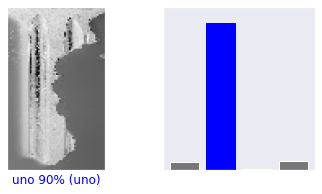

In [ ]:
%run Functions/dl_plot2.py
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)

<Figure size 432x288 with 0 Axes>

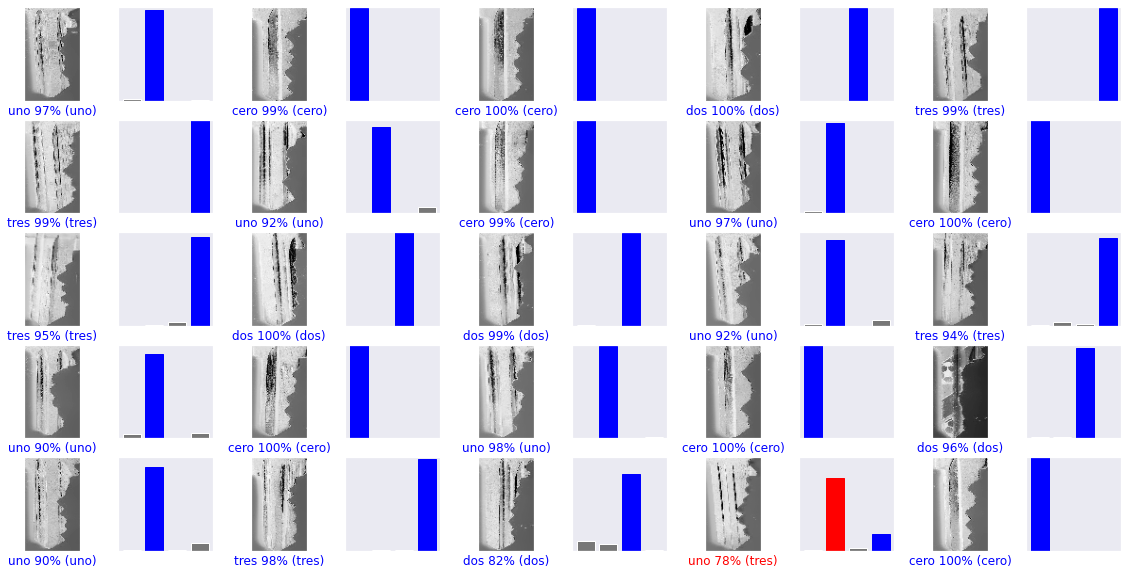

In [ ]:
#@title *code* Batch of predictions
%run Functions/dl_plot2.py
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, y_test)

# **Conclusiones**



*   Para este notebook se recortaron las imagenes individualmente de modo tal que en estas solo quedara nuestra zona objetivo que es el espadín de la llave. Hecho este **recorte** podemos apreciar una gran mejora en el rendimiento por parte de los clasificadores en comparación con los dos primeros notebooks.
*   Por parte de los clasificadores se observa que ninguno de ellos obtuvo una precisión menor al 90%, donde el que obtuvo un mejor rendimiento prediciendo las imagenes del test fue el Random Forest Classifier con un 97%.
*   En la red neuronal observamos que se necesitan pocos epochs en el entramiento para lograr una precisión del 100% y ademas se logró una precisión del 94% en el test.
